# Modélisation d'une caténaire

#### Table des matières
1. [Introduction](#1.Introduction) 
2. [Modélisation](#2.Modélisation) 
1. [Code](#subparagraph1) 
3. [Références](#paragraph2) 

---

L'objectif de ce document est de réaliser la modélisation par éléments finis d'un caténaire.

## 1. Introduction

La caténaire constitue le système suivant :
$$ caténaire = \{fil porteur + pendule + fil de contact\} $$

On commence par réaliser une modélisation du fil de contact. On utilise une modèle barre. Le fil est modélisé par une barre de section constant dont on ne peut transmettre que des efforts longitunidaux dans un premier temps.



### Modèle de poutre d'Euler-Bernoulli

On peut utiliser une autre approche pour modéliser les déformations d'une poutre qui repose sur des hypothèses simplificatrices : 
- Les sections restent perpendiculaire à la fibre neutre de la poutre
- les déformations sont petites ($\theta << 1$) permet de linéariser certaines formules trognométriques
- Le matériau est homogène, élastique linéaire et isotrope

![modelisation schema](Images/Euler.png "title")

On approxime le déplacement d'un élément par la formule suivante : 

$$ u = N q $$

On utilise les valeurs au extremité de l'élément pour reconstituer le déplacement à l'intérieur de l'élément.

$$ q = \begin{pmatrix} u_1\\ v_1 \\ \phi_1 \\  u_2\\ v_2 \\ \phi_2 \end{pmatrix} $$

Les fonctions d'interpolation sont plus compliquées et longues à trouver que dans le cas de la modélisation en barre.

On obtient une matrice de raideur élementaire de cette forme :

$ A = S $
$ B = \frac{I}{L^2} $
$$ K_{elem} = \frac{ES}{L} \begin{pmatrix}
A & 0 & 0 & -A & 0 & 0\\
0 & 12B & 6LB & 0 & -12B & 6LB \\
0 & 6LB & 4L^2B & 0 & -6LB & 2L^2B \\
-A & 0 & 0 & A & 0 & 0\\
0 & -12B & -6LB & 0 & 12B & -6LB \\
0 & 6LB & 2L^2B & 0 & -6LB & 4L^2B 
\end{pmatrix} $$

La matrice de masse vaut : 
$$ M_{elem} = \frac{\rho S}{420 L} \begin{pmatrix}
140 & 0 & 0 & 70 & 0 & 0\\
0 & 156 & 22L & 0 & 54 & -13L \\
0 & 22L & 4L^2 & 0 & 13L & -3L^2 \\
70 & 0 & 0 & 140 & 0 & 0\\
0 & 54 & 13L & 0 & 156 & -22L \\
0 & -13L & -3L^2  & 0 & -22L & 4L^2 
\end{pmatrix} $$


> The overriding design goal for Markdown's
> formatting syntax is to make it as readable
> as possible. The idea is that a
> Markdown-formatted document should be
> publishable as-is, as plain text, without
> looking like it's been marked up with tags
> or formatting instructions.

### Codage du modéle

On va maintenant coder tout ça en python et automatiser un peut les calculs pour plus d'éléments. 
Et faire de la visualisation pour vérifier un peu ce qu'on fait.

On commence par importer les package nécessaires : 
- *numpy* pour la création et manipulation de matrice
- *matplotlib* pour le tracer de graphe

Nombre de noeuds : 3
Nombre de elements : 3


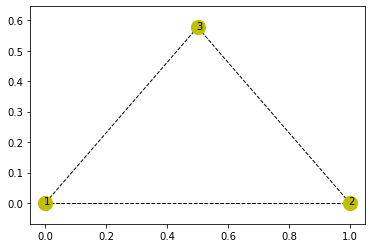

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

%run src\Cas_Test.ipynb

### Etape 1 : on defini notre geometrie
cas = 3
if cas == 1 : 
    NL = np.array([[1,0],
              [2,0],
              [3,0]])
    EL = np.array([[1,2],
              [2,3]])
elif cas == 2 :
    NL = np.array([[1,0],
                  [2,0],
                  [3,0],
                  [4,0],
                  [5,0]])
    EL = np.array([[1,2],
                  [2,3],
                  [3,4],
                  [4,5]])
elif cas == 3 :
    NL = np.array([[0,0],
                [1,0],
                [1/2,1/np.sqrt(3)]])
    EL = np.array([[1,2],
                 [2,3],
                 [3,1]])

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)

geom(NL)

| Variable    | Libellé / Definition                                        | Unité / Unit|
| ----------- | ----------------------------------------------------------- | ----------- |
|  E          | Module d'Young                                              | Pa          |
|  S          | Section de l'element                                        | m2          |
| L       | Longueur de l'element  | m          |

### Cas Poutre complete (effort axial, transverse et moment)

k :  [[ 33904346.23776836  15550538.31809392 -31904346.23776836
   25362187.49498651  15550538.31809392]
 [ 15550538.31809392  18474458.73132763 -15550538.31809392
   13467161.22599267   5237229.36566382]
 [-31904346.23776836 -15550538.31809392  63808692.47553672
          0.         -31101076.63618785]
 [ 25362187.49498651  13467161.22599267         0.
   49165826.69806848         0.        ]
 [ 15550538.31809392   5237229.36566382 -31101076.63618785
          0.          20948917.46265527]]
[   0.    0. 1000. 1000.    0.]
[-6.16824998e-06  1.71253955e-05  6.11698044e-05  1.88303526e-05
  9.11109972e-05]
U 
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.16824998e-06
  0.00000000e+00  1.71253955e-05  6.11698044e-05  1.88303526e-05
  9.11109972e-05]


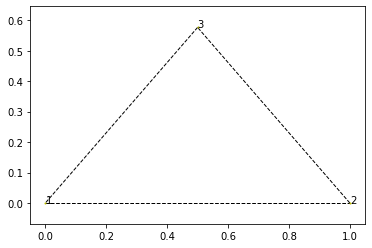

In [18]:
### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales
E = 20e9 # Module D'Young [en Pa]
S = 100e-6 # Section [en m^2]
L = 1 # Longueur d'un element [en m]

%run src\Fonctions.ipynb

I = 1 # Moment d'inertie m^4
A = S
B = I/L**2
K_elem = E*S/L*np.array([[1, 0 , 0, -1, 0, 0],
                         [0, 12*B , 6*L*B, 0, -12*B, 6*L*B],
                         [0, 6*L*B , 4*L**2*B, 0, -6*L*B, 2*L**2*B],
                         [-1, 0, 0, 1, 0, 0],
                         [0, -12*B , -6*L*B , 0, 12*B , -6*L*B],
                         [0,  6*L*B , 2*L**2*B , 0, -6*L*B ,  4*L**2*B]])

def K_elem(L_e) :
    B = I/L_e**2
    K = E*S/L_e*np.array([[1, 0 , 0, -1, 0, 0],
                         [0, 12*B , 6*L_e*B, 0, -12*B, 6*L_e*B],
                         [0, 6*L_e*B , 4*L_e**2*B, 0, -6*L_e*B, 2*L_e**2*B],
                         [-1, 0, 0, 1, 0, 0],
                         [0, -12*B , -6*L_e*B , 0, 12*B , -6*L_e*B],
                         [0,  6*L_e*B , 2*L_e**2*B , 0, -6*L_e*B ,  4*L_e**2*B]])
    return K

### Etape 3 : On passe les coordonnees locales en coordonnees globales

matrices_de_passage = changement_coord_complet(NL,EL)

### Etape 4 : Assemblage de la matrice globale 

K_glob = assemblage_complet(matrices_de_passage,NL,EL)

### Etape 5 : Application des conditions limites

q = 150 # Charge repartie (en N/m)
    
#Q_equi = distributed_load_complet(NoN,NoE,q)

if cas == 1 : 
    F = np.array([[0],
                 [0],
                  [0],
                 [0],
                 [0],
                  [0],
                  [0],
                 [20000],
                 [0]])

    BC = np.array([[0., 0., 0., 0., 0., 0.],
                   [0., 0., 0., 0., 0., 0.],
                   [0., 0., 0., 0., 0., 0.],
                   [1., 0., 0., 0., 0., 0.],
                  [0., 1., 0., 0., 0., 0.],
                  [0., 0., 1., 0., 0., 0.],
                  [0., 0., 0., 1., 0., 0.],
                  [0., 0., 0., 0., 1., 0.],
                  [0., 0., 0., 0., 0., 1.]])
elif cas == 2 :
    F = np.array([[0,0,0],
                      [0,0,0],
                     [0,0,0],
                     [0,0,0],
                     [0,2000,0]]).flatten()
    BC = np.eye(len(NL)*3)
    lbc = [0,1,2]
    BC = np.delete(BC,lbc,axis=1)
    print(F,BC)
elif cas == 3 :
    F = np.array([[0,0,0],
                [0,0,0],
                [1000,1000,0]]).flatten()
    BC = np.eye(len(NL)*3)
    lbc = [0,1,2,4]
    BC = np.delete(BC,lbc,axis=1)


### Etape 7 : Resolution

U = solve(K_glob,F,BC)
print("U \n",U)

### Etape 8 : Affichage
plot_disp(NL,U)

### paramètres du modèle

$\sigma = \frac{T}{S}$

In [7]:
T = 12000 # Tension appliquee au fil [en N]
S_fc = 150e-6 # Section du fil de contact [en m^2]

sigma_fc = T/S_fc # Contrainte dans le fil de contact [en N/m^2]
print("contrainte dans le fil :", sigma_fc/1e6, " MPa")

contrainte dans le fil : 80.0  MPa


## Liens utiles :

* [1]: <https://fr.wikipedia.org/wiki/Cat%C3%A9naire> "Définition caténaire"

Je me suis grandement inspiré des excellentes vidéos de Mike Foster sur Youtube : <https://www.youtube.com/watch?v=1Wv-S6OCsPY>